<a href="https://colab.research.google.com/github/IgorEdu/imersao-ia-analises-comercial/blob/main/imersao_ia_analises_comercial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise comercial

Analise uma base de pedidos comerciais, descubra quais os principais motivos para clientes estarem deixando de comprar, crie cenários de recuperação de clientes.
Crie projeções de novas demandas com base no histórico de pedidos e analise também as sazonalidades de pedidos desobrindo como melhorar suas vendas nesses períodos criando campanhas de marketing voltadas para os meses com menos vendas.

## Executando o projeto



*   Importe o arquivo de pedidos no Google Colab
    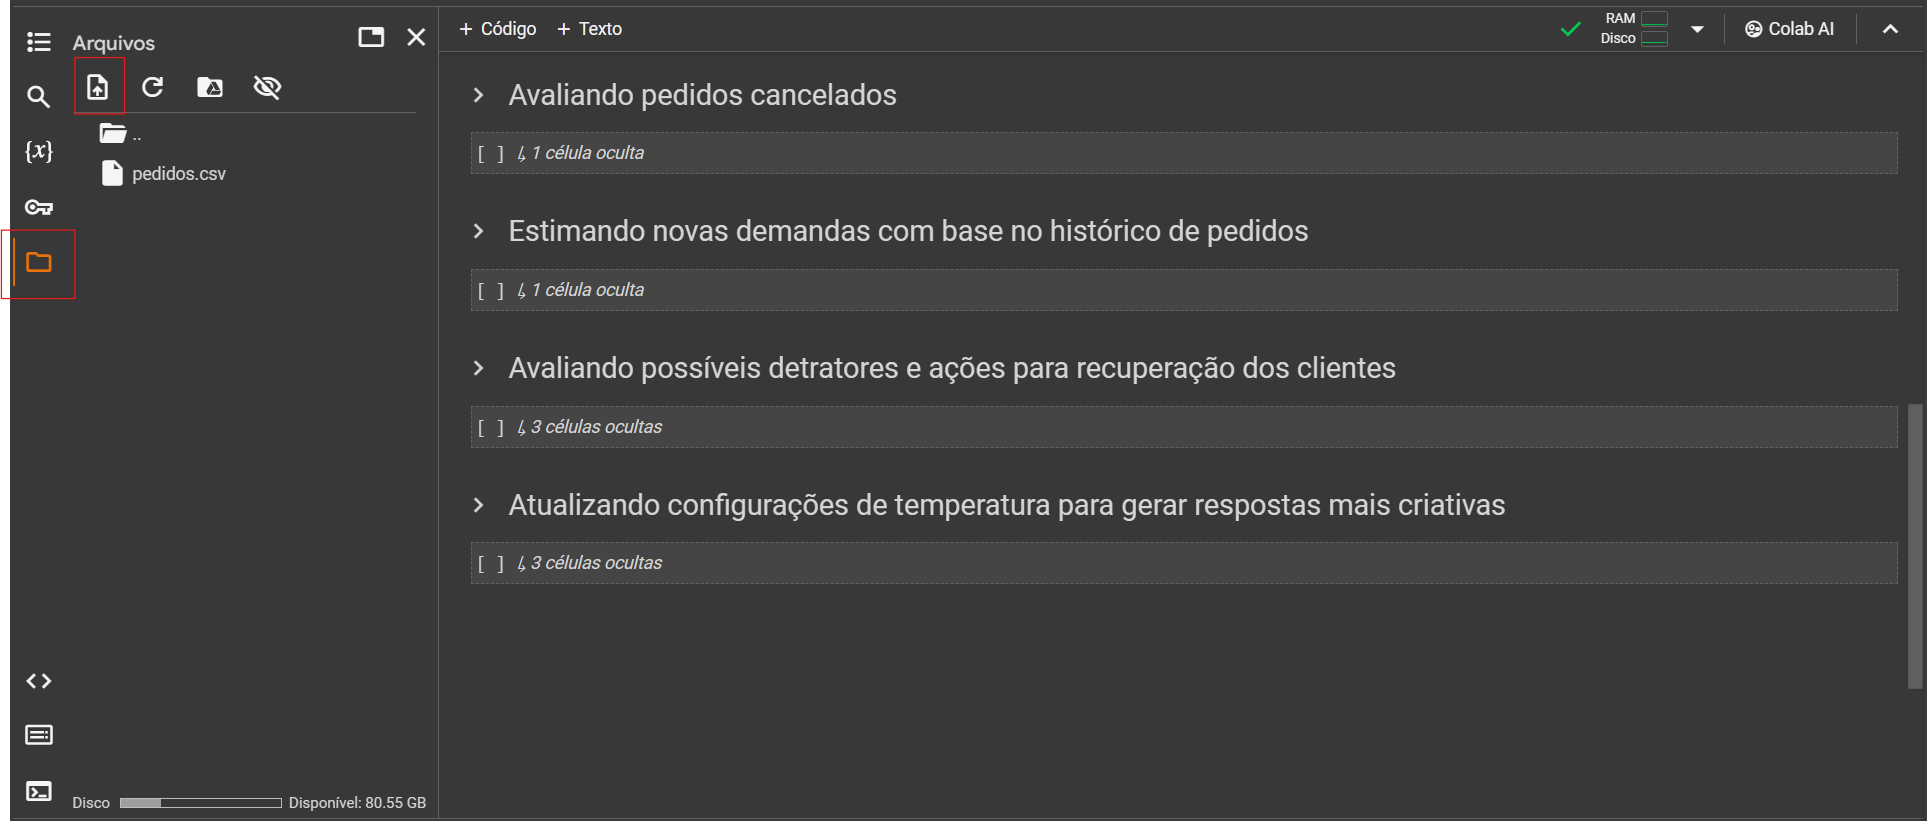
*   Importe sua API Key na área "Secrets" do Google Colab
    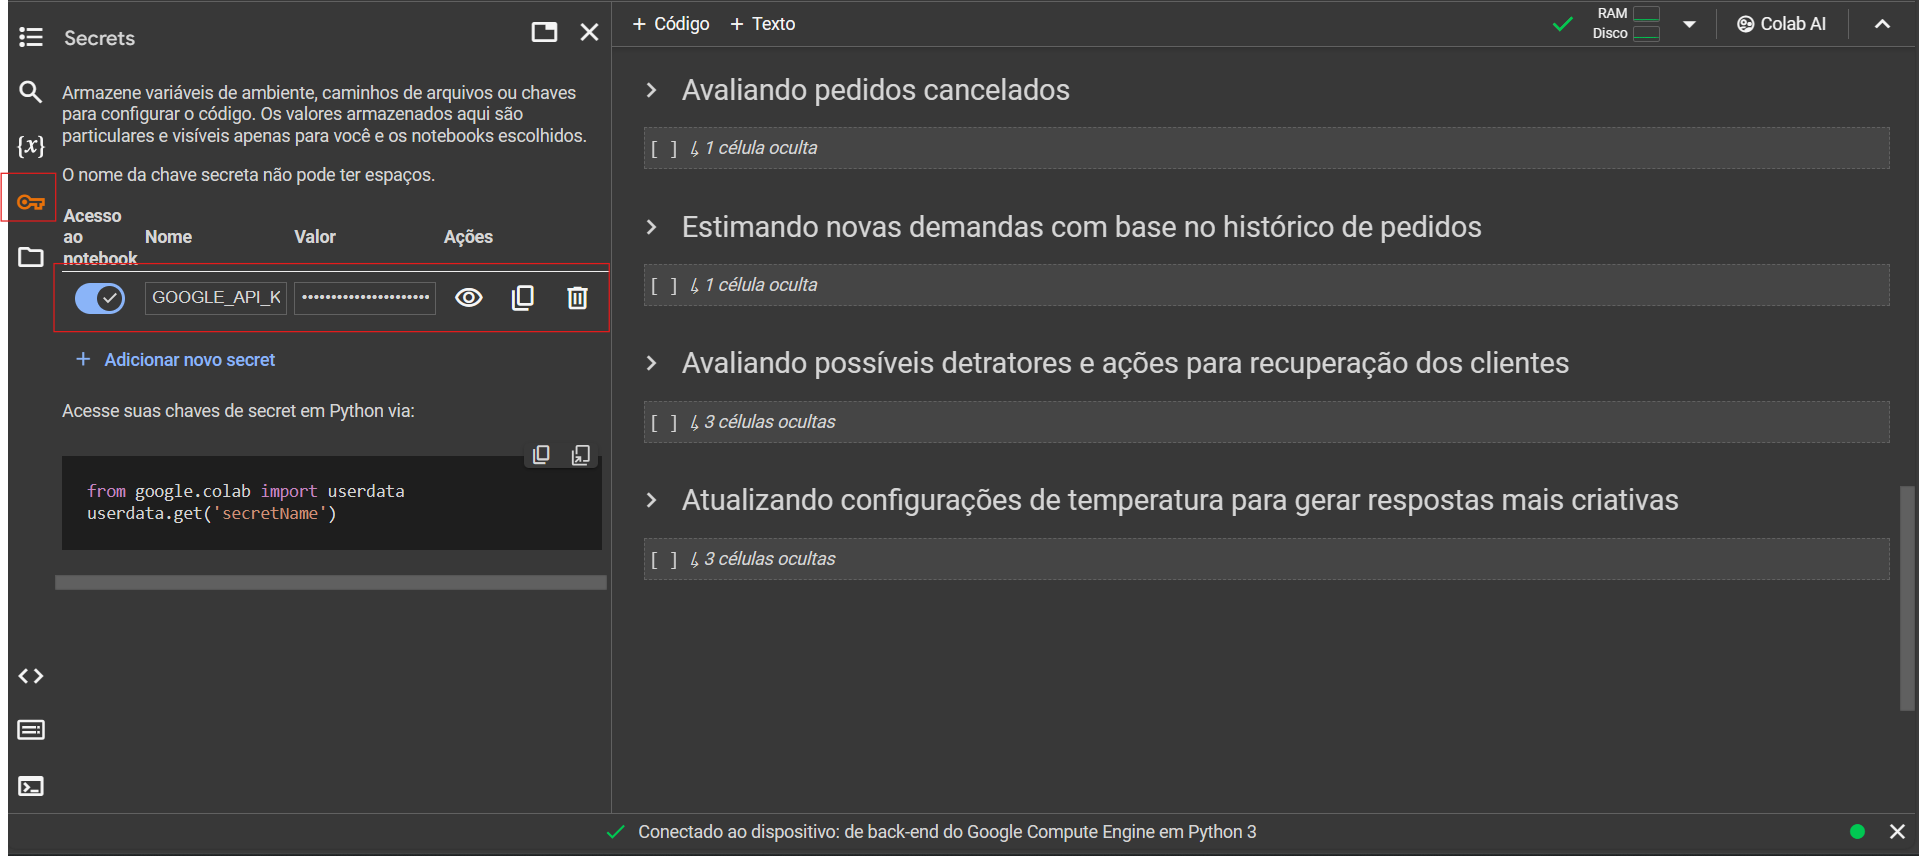
*   No menu "Ambiente de execução" escolha a opção "Executar tudo"
*   Após a execução será gerado um PDF com sugestões para recuperação de clientes listados como possiveis detratores e um PDF com uma sugestão de campanha de marketing para aumentar vendas em perídos com menores vendas

## Instalando e importando dependências

In [124]:
!pip install -q -U google-generativeai

In [125]:
!pip install -q -U markdown-pdf

In [126]:
import pathlib
import textwrap
import pandas as pd
import numpy as np

import google.generativeai as genai

from google.colab import userdata

from markdown_pdf import MarkdownPdf, Section

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Importando arquivo CSV para avaliação

In [127]:
with open('pedidos.csv') as file:
  text_data = file.read()

## Alterando configurações de temperatura para respostas mais precisas

In [128]:
model_name = "gemini-1.0-pro"

generation_config = {
    "candidate_count": 1,
    "temperature": 0
}

safety_settings = {
    "HARASSMENT": "HIGH",
    "HATE": "HIGH",
    "SEXUAL": "HIGH",
    "DANGEROUS": "HIGH"
}

model = genai.GenerativeModel(model_name=model_name,
                              generation_config=generation_config,
                              safety_settings=safety_settings)

## Avaliando pedidos cancelados

In [129]:
response = model.generate_content(['Quais pedidos foram cancelados? Retorne também o cabeçalho da tabela', text_data])
pedidos_cancelados = response.text
#Chain-of-Thought Prompting (https://arxiv.org/pdf/2201.11903)
preparacao_consulta = 'Pergunta: Qual o principal motivo de cancelamento? 3;C12938;cancelado;A123652 - TECLADO;2;0;desistência por parte do cliente;02/09/2023;12/09/2023;17/09/2023\n10;C09876;cancelado;A457920 - MOUSE;4;0;falta de estoque;24/12/2023;05/01/2024;08/01/2024\n17;C04567;cancelado;A989201 - HEADPHONE;2;0;desistência por parte do cliente;27/01/2024;08/01/2024;11/02/2024 \n Principal motivo de cancelamento: O principal motivo de cancelamento é Desistência por parte do cliente; Apresentados 3 casos, sendo 2 de desistência por parte do cliente representando cerca de 66,66% dos casos'

response = model.generate_content([preparacao_consulta + '\n Pergunta: Qual o principal motivo de cancelamento? ', pedidos_cancelados])
display(Markdown(response.text))

Principal motivo de cancelamento: Desistência por parte do cliente; Apresentados 6 casos, sendo 5 de desistência por parte do cliente representando cerca de 83,33% dos casos

## Estimando novas demandas com base no histórico de pedidos

In [130]:
response = model.generate_content(['Considere o histórico de pedidos, gere uma tendencia de novos pedidos com base na sazonalidade?', text_data])
sazonalidades = response.text
display(Markdown(sazonalidades))

**Tendência de Novos Pedidos com Base na Sazonalidade**

**Período de Alta Demanda:**

* **Setembro a Dezembro:** Aumento significativo de pedidos, especialmente para produtos como teclados, mouses e monitores.

**Período de Demanda Média:**

* **Janeiro a Março:** Demanda constante, com pedidos principalmente para produtos como fones de ouvido e monitores.

**Período de Baixa Demanda:**

* **Abril a Agosto:** Demanda reduzida, com pedidos principalmente para produtos como teclados e mouses.

**Previsões de Novos Pedidos:**

Com base na sazonalidade histórica, é possível prever os seguintes novos pedidos para os próximos meses:

* **Setembro:** Aumento de pedidos para teclados, mouses e monitores.
* **Outubro:** Demanda contínua para teclados, mouses e monitores, além de um aumento de pedidos para fones de ouvido.
* **Novembro:** Pico de pedidos para teclados, mouses e monitores.
* **Dezembro:** Demanda elevada para todos os produtos, especialmente monitores e fones de ouvido.
* **Janeiro:** Demanda constante para fones de ouvido e monitores.
* **Fevereiro:** Demanda reduzida para todos os produtos.
* **Março:** Aumento de pedidos para fones de ouvido e monitores.
* **Abril:** Demanda baixa para todos os produtos.
* **Maio:** Demanda crescente para teclados e mouses.
* **Junho:** Demanda constante para teclados e mouses.
* **Julho:** Demanda reduzida para todos os produtos.
* **Agosto:** Demanda muito baixa para todos os produtos.

## Avaliando possíveis detratores e ações para recuperação dos clientes

In [131]:
response = model.generate_content(['Quais clientes podem ser um possivel detrator e por qual motivo?', text_data])
possiveis_detratores = response.text
display(Markdown(possiveis_detratores))

**Clientes que podem ser possíveis detratores:**

* **C12938:**
    * Pedido cancelado devido a desistência do cliente.
* **C09876:**
    * Pedido cancelado devido à falta de estoque.
* **C04567:**
    * Dois pedidos cancelados devido a desistência do cliente.
* **C09123:**
    * Um pedido cancelado devido a desistência do cliente.
* **C04567:**
    * Pedido parcialmente entregue com apenas 60% dos itens recebidos.
* **C01234:**
    * Pedido parcialmente entregue com apenas 57% dos itens recebidos.
* **C05678:**
    * Pedido aberto com atraso de 15 dias na data prevista de entrega.
* **C09123:**
    * Pedido aberto com atraso de 14 dias na data prevista de entrega.
* **C04567:**
    * Pedido aberto com atraso de 13 dias na data prevista de entrega.
* **C01234:**
    * Pedido aberto com atraso de 12 dias na data prevista de entrega.
* **C05678:**
    * Pedido aberto com atraso de 11 dias na data prevista de entrega.
* **C09123:**
    * Pedido aberto com atraso de 10 dias na data prevista de entrega.
* **C04567:**
    * Pedido aberto com atraso de 9 dias na data prevista de entrega.
* **C01234:**
    * Pedido aberto com atraso de 8 dias na data prevista de entrega.
* **C05678:**
    * Pedido aberto com atraso de 7 dias na data prevista de entrega.
* **C09123:**
    * Pedido aberto com atraso de 6 dias na data prevista de entrega.
* **C04567:**
    * Pedido aberto com atraso de 5 dias na data prevista de entrega.
* **C01234:**
    * Pedido aberto com atraso de 4 dias na data prevista de entrega.
* **C05678:**
    * Pedido aberto com atraso de 3 dias na data prevista de entrega.
* **C09123:**
    * Pedido aberto com atraso de 2 dias na data prevista de entrega.
* **C04567:**
    * Pedido aberto com atraso de 1 dia na data prevista de entrega.

In [132]:
response = model.generate_content([possiveis_detratores + ' Com base na listagem de detratores, quais ações podem ser feitas para recuperar os clientes?'])
display(Markdown(response.text))

**Ações para Recuperar Clientes Detratores:**

**Pedidos Cancelados:**

* **C12938:** Entrar em contato com o cliente para entender o motivo da desistência e oferecer uma solução alternativa.
* **C09876:** Verificar a disponibilidade do estoque e informar o cliente sobre a data prevista de entrega.

**Pedidos Parcialmente Entregues:**

* **C04567:** Entregar os itens restantes o mais rápido possível e oferecer um desconto ou crédito pela inconveniência.
* **C01234:** Entregar os itens restantes o mais rápido possível e oferecer um reembolso parcial ou um produto substituto.

**Pedidos Atrasados:**

* **C05678:** Fornecer atualizações regulares sobre o status do pedido e oferecer uma compensação pela demora.
* **C09123:** Oferecer um desconto ou crédito pela demora e manter o cliente informado sobre o progresso do pedido.
* **C04567:** Oferecer um reembolso parcial ou um produto substituto pela demora e manter o cliente informado sobre o progresso do pedido.
* **C01234:** Oferecer um reembolso total ou um produto substituto pela demora e manter o cliente informado sobre o progresso do pedido.

**Pedidos Abertos:**

* **C05678:** Entrar em contato com o cliente para confirmar o status do pedido e fornecer uma data prevista de entrega.
* **C09123:** Entrar em contato com o cliente para confirmar o status do pedido e fornecer uma data prevista de entrega.
* **C04567:** Entrar em contato com o cliente para confirmar o status do pedido e fornecer uma data prevista de entrega.
* **C01234:** Entrar em contato com o cliente para confirmar o status do pedido e fornecer uma data prevista de entrega.

**Ações Adicionais:**

* **Oferecer um desconto ou crédito:** Para todos os clientes detratores, oferecer um desconto ou crédito em pedidos futuros para compensar pela experiência negativa.
* **Solicitar feedback:** Entrar em contato com os clientes detratores para solicitar feedback sobre sua experiência e identificar áreas de melhoria.
* **Melhorar a comunicação:** Manter os clientes informados sobre o status de seus pedidos e fornecer atualizações regulares para evitar atrasos e cancelamentos inesperados.
* **Treinar a equipe:** Treinar a equipe de atendimento ao cliente para lidar com clientes insatisfeitos de forma eficaz e resolver problemas rapidamente.

In [133]:
pdf = MarkdownPdf(toc_level=0)
pdf.add_section(Section(response.text, paper_size="A4-L"))
pdf.meta["title"] = "Ações de recuperação de clientes insatisfeitos"
pdf.meta["author"] = "Gerado pelo Gemini"

pdf.save("acoes-recuperacao-clientes.pdf")

## Atualizando configurações de temperatura para gerar respostas mais criativas

In [134]:
generation_config = {
    "candidate_count": 1,
    "temperature": 0.8
}

model = genai.GenerativeModel(model_name="gemini-1.0-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

In [135]:
response = model.generate_content(['Com base na sazonalidade, gere uma campanha de marketing para aumentar as vendas nos períodos com previsão de menor demanda, considere também datas comemorativas desses períodos', sazonalidades])
display(Markdown(response.text))

**Campanha de Marketing para Períodos de Baixa Demanda**

**Público-alvo:** Clientes existentes e potenciais

**Objetivo:** Aumentar as vendas durante os períodos de baixa demanda (abril a agosto)

**Datas comemorativas:** Considere datas comemorativas como:

* Dia das Mães (maio)
* Dia dos Namorados (junho)
* Dia dos Pais (agosto)

**Táticas:**

**1. Ofertas e descontos:**

* Ofereça descontos significativos em produtos populares, como teclados e mouses.
* Crie pacotes de produtos com preços reduzidos.
* Ofereça frete grátis para pedidos acima de um determinado valor.

**2. Marketing de conteúdo:**

* Crie conteúdo valioso, como guias, tutoriais e análises de produtos, para educar e envolver o público.
* Compartilhe depoimentos e estudos de caso de clientes satisfeitos para construir credibilidade.
* Publique conteúdo nas redes sociais regularmente para manter o engajamento.

**3. Parcerias e promoções:**

* Faça parceria com influenciadores para promover seus produtos e alcançar um público mais amplo.
* Ofereça promoções exclusivas para membros de fidelidade e assinantes de e-mail.
* Organize concursos e sorteios para gerar empolgação e aumentar o engajamento.

**4. Campanhas de e-mail:**

* Segmente sua lista de e-mail e envie campanhas direcionadas com ofertas e promoções relevantes.
* Use automação de e-mail para enviar sequências de e-mail personalizadas com base no comportamento do cliente.
* Inclua depoimentos e avaliações de produtos em seus e-mails para aumentar a confiança.

**5. Otimização de mecanismos de pesquisa (SEO):**

* Otimize seu site para palavras-chave relevantes, como "desconto em teclado" e "oferta de mouse".
* Crie conteúdo de blog informativo que responda às perguntas dos clientes e melhore a classificação do seu site nos resultados de pesquisa.
* Construa backlinks de alta qualidade para melhorar a autoridade do seu site.

**6. Anúncios pagos:**

* Use anúncios pagos no Google AdWords e plataformas de mídia social para alcançar clientes em potencial que procuram produtos específicos.
* Segmente seus anúncios com base em dados demográficos, interesses e comportamentos de compra.
* Otimize suas campanhas de anúncios para melhorar o retorno sobre o investimento (ROI).

**Monitoramento e avaliação:**

* Monitore o desempenho de suas campanhas de marketing usando métricas como tráfego do site, geração de leads e vendas.
* Ajuste suas estratégias conforme necessário para otimizar os resultados e maximizar o ROI.

In [136]:
pdf = MarkdownPdf(toc_level=0)
pdf.add_section(Section(response.text, paper_size="A4-L"))
pdf.meta["title"] = "Campanha de Marketing"
pdf.meta["author"] = "Gerado pelo Gemini"

pdf.save("campanha-marketing.pdf")